### Básico - Análise Exploratória de dados com Python - Base do Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando a base inicial
df = pd.read_csv('train.csv')

In [3]:
#Conferindo se a base está OK!
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,300.00,NaN,S


### 1 - Entendendo os tipos de variáveis

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Criando duas listas com nomes das colunas, uma para as colunas quantitativas e outra para as qualitativas.
#Esse procedimento é realizado pois o tiop de análise a ser performada é diferente.
#O nome da coluna é o índice da df.dtype

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)

In [6]:
print('Lista Quanti: ',quanti)
print('Lista Quali: ', quali)

Lista Quanti:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Lista Quali:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 2 - Estatística Descritiva e Tabelas de Frequência

In [7]:
quanti

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [8]:
#Vamos criar um dataframe para as variáveis quanti para fazermos estatística descritiva

df_quanti = df[quanti]

In [9]:
df_quanti.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.25
1,2,1,1,38.0,1,0,712833.00
2,3,1,3,26.0,0,0,7925.00
3,4,1,1,35.0,1,0,53.10
4,5,0,3,35.0,0,0,300.00


In [10]:
#Estatística Descritiva

df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.717325,0.523008,0.381594,7.424598e+05
std,257.353842,0.486592,0.836071,14.591695,1.102743,0.806057,5.995953e+06
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,2.655000e+01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,7.333000e+03
75%,668.500000,1.000000,3.000000,38.750000,1.000000,0.000000,2.546670e+05
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,1.240913e+08


In [11]:
#Calculado a mediana
df.median()

C:\Users\NATALI~1.DIA\AppData\Local\Temp/ipykernel_12660/3391848824.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


PassengerId     446.0
Survived          0.0
Pclass            3.0
Age              28.0
SibSp             0.0
Parch             0.0
Fare           7333.0
dtype: float64

In [12]:
#Tabela de frequência para as variáveis qualitativas

df_quali = df[quali]

#Fazendo a tabela de frequência paa a variável Sex

df_quali.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [13]:
#Fazendo todas as tabelas de frequência de uma só vez

#Vamos considerar a variável Nome que sempre será única para cada passageiro

for i in df_quali.columns:
    if i == 'Name':
        pass
    else:
        print('--------------------')
        print('Variável: ',i)
        print(df_quali.groupby(i).Name.count())
        print('--------------------')

--------------------
Variável:  Sex
Sex
female    314
male      577
Name: Name, dtype: int64
--------------------
--------------------
Variável:  Ticket
Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
--------------------
--------------------
Variável:  Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
--------------------
--------------------
Variável:  Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
--------------------


### 3 - Detecção de dados nulos

In [14]:
# Para cada variável no DF iremos pegar a quantidade de dados nulos

#Vamos criar uma tabela (data frame) para visualizar a quantidade de dados nulos

nulos = pd.DataFrame()
nulos['Variável'] = df.columns

In [15]:
nulos

,Variável
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [16]:
# Vamos colocar na outra coluna, a quantidade de nulos no DF

nulos['Quantidade'] = pd.Series()
nulos['Porcentagem'] = pd.Series()

for i in nulos.index:
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum()/df.PassengerId.count())*100

C:\Users\NATALI~1.DIA\AppData\Local\Temp/ipykernel_12660/4232430680.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['Quantidade'] = pd.Series()
C:\Users\NATALI~1.DIA\AppData\Local\Temp/ipykernel_12660/4232430680.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['Porcentagem'] = pd.Series()
C:\Users\NATALI~1.DIA\AppData\Local\Temp/ipykernel_12660/4232430680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
C:\Users\NATALI~1.DIA\AppData\Local\Temp/ipykernel_12660/4232430680.py:8: Settin

In [17]:
nulos

,Variável,Quantidade,Porcentagem
0,PassengerId,0.0,0.000000
1,Survived,0.0,0.000000
2,Pclass,0.0,0.000000
3,Name,0.0,0.000000
4,Sex,0.0,0.000000
5,Age,177.0,19.865320
6,SibSp,0.0,0.000000
7,Parch,0.0,0.000000
8,Ticket,0.0,0.000000
9,Fare,0.0,0.000000


### Qual estratégia usar com os nulos?

#### Para a variável Cabin, temos muitos dados vazios, se removermos todas as linhas vazias, quase não haverá linhas restantes  no dataframe.
#### Vamos precisar preencher essa variável - como é qualitativa usaremos a moda para preencher (a que mais aparece)

#### Para a variável Age também há quantidade relevante de vazios (~20%).
#### Também será preciso preencher - como é quantitativa vamos utilizar a média das idades para preencher

#### Na variável Embarked temos poucos vazios (0,22%) - podemos remover as lihas vazias


In [18]:
# Removendo as linhas da variável Embarked

df2 = df.dropna(subset=['Embarked'])

In [19]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,300.00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [20]:
# Preenhendo a variável Age
df3 = df2.copy()
df3.Age = df2.Age.fillna(df2.Age.mean())

In [21]:
df3.Age.isna().sum()

0

In [22]:
# Preenchendo a variável Cabin
# As várias cabines no resultado indicam que cada uma delas é encontrada o mesmo número de vezes

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object


In [23]:
# Iremos colocar escolha aleatória do valor da moda

moda = []
for i in df4.Cabin.mode().values:
    moda.append(i)

In [24]:
# Temos a lista com os valores da moda
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [25]:
# Preenchendo com os valores aleatórios da moda

import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))

In [26]:
df4.Cabin.isna().sum()

0

### 4 - Detecção de Outliers

<AxesSubplot:>

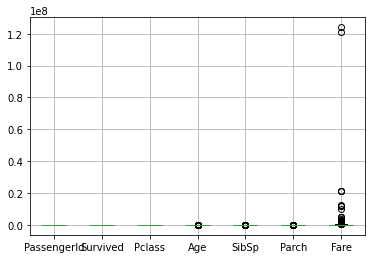

In [27]:
# Primeiro usaremos o boxplot como recurso
df4.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x2826606d1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2826606d8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28266061df0>],
 'medians': [<matplotlib.lines.Line2D at 0x28266079040>],
 'fliers': [<matplotlib.lines.Line2D at 0x282660793d0>],
 'means': []}

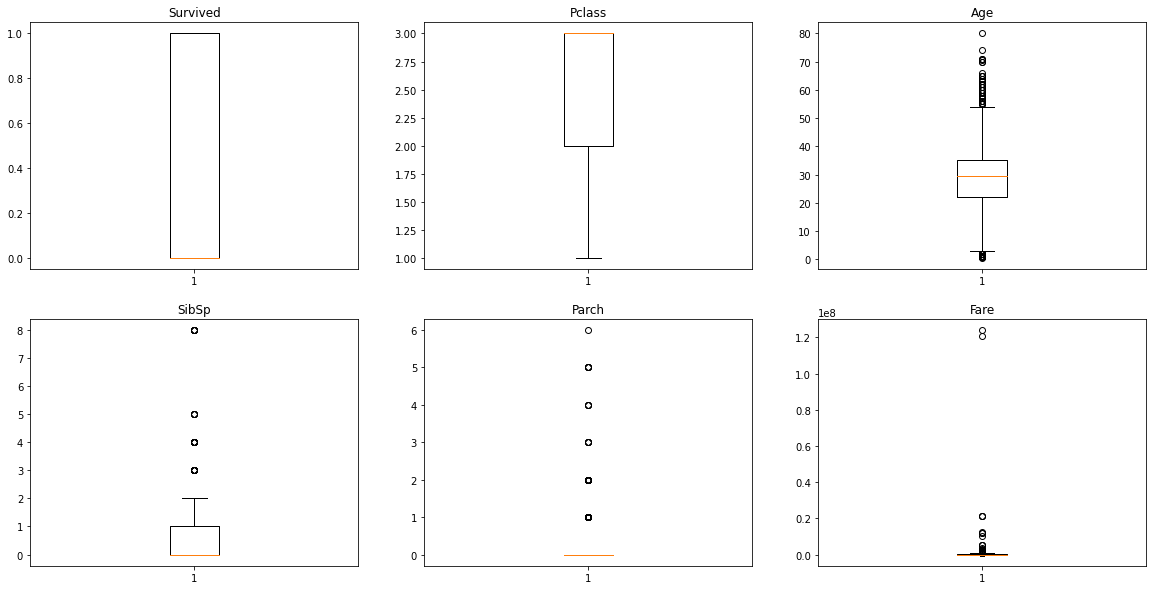

In [28]:
# Dá para perceber que o boxplot acima não ficou bom, pq tem muita coisa em escalas diferentes.
# Vamos usar uma forma de plotar vários gráficos em uma figura.
# Não preciso do passenger ID, pois é um para cada passageiro, não me diz muita coisa.b

fig, axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].set_title('Survived')
axs[0,0].boxplot(df4.Survived)
axs[0,1].set_title('Pclass')
axs[0,1].boxplot(df4.Pclass)
axs[0,2].set_title('Age')
axs[0,2].boxplot(df4.Age)
axs[1,0].set_title('SibSp')
axs[1,0].boxplot(df4.SibSp)
axs[1,1].set_title('Parch')
axs[1,1].boxplot(df4.Parch)
axs[1,2].set_title('Fare')
axs[1,2].boxplot(df4.Fare)

#### Pode-se obervar pelos gráficos que algumas variáveis possuem uma quantidade grande de outliers, por exemplo, Parch, Age e Fare.
#### Vamos estudar mais a fundo essas variáveis, calculando a % de outliers

In [29]:
# Outliers são todos os pontos fora do limite superior ou inferior da amostra.

# Limite superior = Q3 + 1,5 * Distância Interquartil
# Limite inferior = Q3 - 1,5 * Distância Interquartil

# Distância Interquartil = (Q3 - Q1)

# Fazendo o cálculo para todas as variáveis quantitativas do dataframe:

df4_quanti = df4[quanti]
colunas = df4_quanti.columns
outliers = []


for i in df4_quanti.columns:
    
    q3 = np.nanquantile(df4_quanti[i],0.75)
    q1 = np.nanquantile(df_quanti[i],0.25)
    dist = q3 - q1
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    
    print('------------------------')
    print(i)
    print(dist)
    print(lim_inf)
    print(lim_sup)
    print('------------------------')
    
    outlier = 0
    
    for j in df4_quanti.index:
        if df4_quanti[i][j] < lim_inf:
            outlier = outlier + 1
        elif df4_quanti[i][j] > lim_sup:
            outlier = outlier + 1
        else:
            pass
    outliers.append(outlier)
    
df_outlier = pd.DataFrame()
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df4_quanti.PassengerId.count()) * 100

------------------------
PassengerId
444.5
-443.25
1334.75
------------------------
------------------------
Survived
1.0
-1.5
2.5
------------------------
------------------------
Pclass
1.0
0.5
4.5
------------------------
------------------------
Age
15.0
-2.5
57.5
------------------------
------------------------
SibSp
1.0
-1.5
2.5
------------------------
------------------------
Parch
0.0
0.0
0.0
------------------------
------------------------
Fare
254640.45
-381934.12500000006
636627.675
------------------------


In [30]:
df_outlier

,Variável,Outliers,Porcentagem
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Age,32,3.599550
4,SibSp,46,5.174353
5,Parch,213,23.959505
6,Fare,153,17.210349


#### No caso de Age e SibSp são poucos os outliers, então poderia até fazer um drop nessas linhas.

#### No caso do Parch e Fare, é preciso entender se são variáveis que importam muito para resolver o problema, para saber como tratar os outliers (de repente estudando eles separadamente, fazendo um modelo específico segmentando esse público).

#### Para esse caso específico vamos manter os outliers apesar de estarem identificados.


### 5 - Visualização de dados

#### Vamos tentar entender o que pode influenciar na taxa de sobrevivência da tripulação

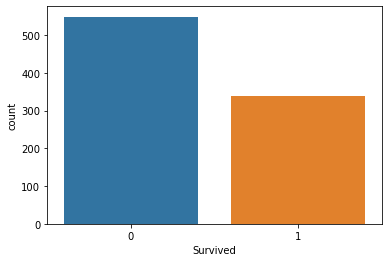

In [31]:
# Quantas pessoas morreram e quantas sobreviveram

sns.countplot(x='Survived',data=df4);

In [32]:
# Quantas pessoas morreram e sobreviveram separadas por sexo
df4.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

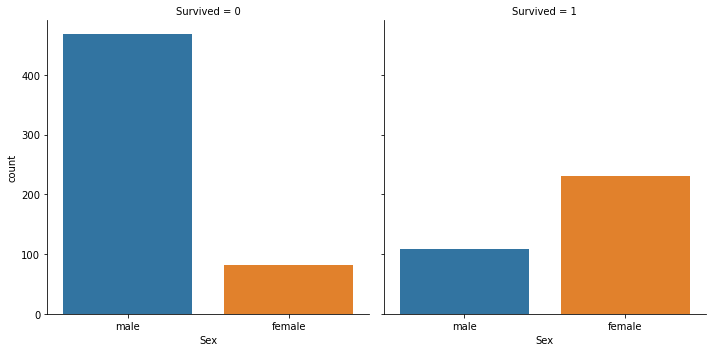

In [33]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df4)

#### Aparentemente as mulheres sobreviveram mais que os homens.

#### Vamos verificar se a classe em que estavam também influenciou.

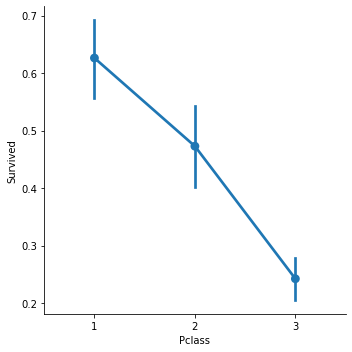

In [34]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=df4)

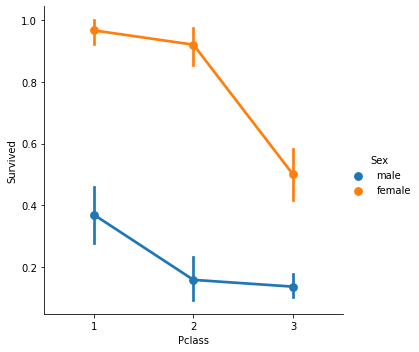

In [35]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=df4)

#### Aparentemente para homens e mulheres, quanto menor a classe que viajavam, mais provável de morerem. Para mulheres essa diferença é ainda maior.

#### Para Embarked (portão pelo qual o passageiro embarcou)
#### C = cherbourg, Q = Queenstown, S = Southampton

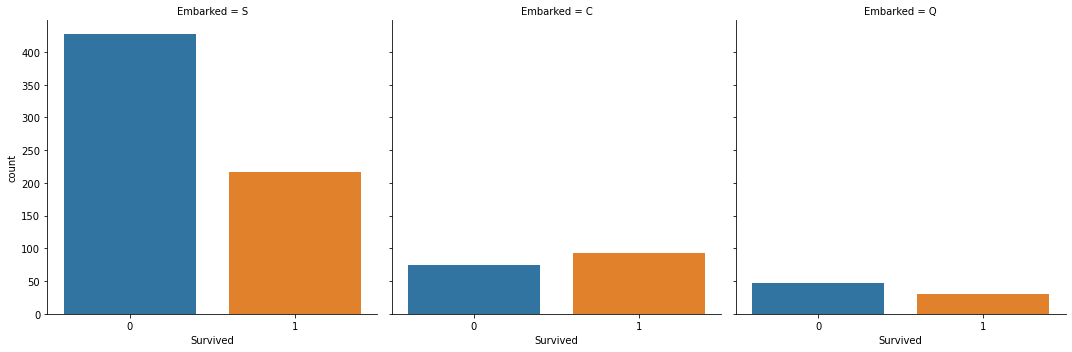

In [36]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df4)

#### Para Age

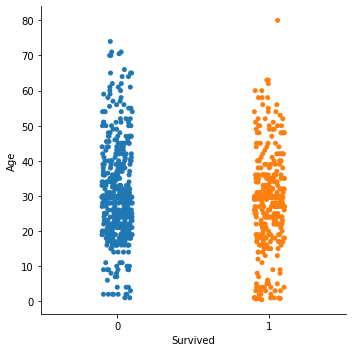

In [37]:
sns.catplot(x='Survived', y='Age', data=df4)

#### Correlação entre todas as variáveis

<AxesSubplot:>

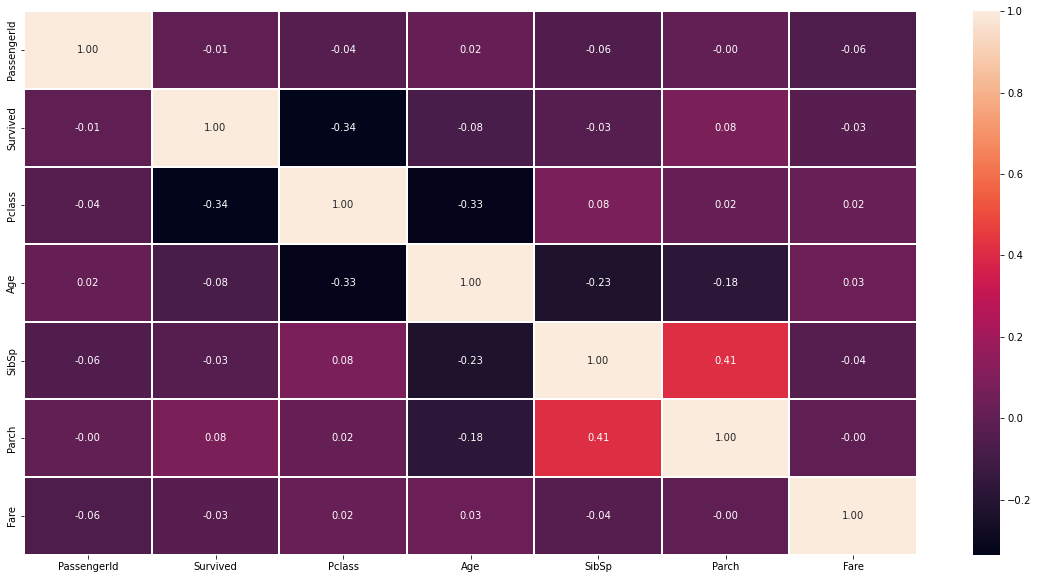

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(),annot=True, linewidths=1.5, fmt='.2f')